# Epigenetic Priming of Endothelial Lineage Before Gastrulation
Sendra et al. 2024

## Retrospective clonal analysis

In [6]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mne.viz import plot_connectivity_circle

# Import data science libraries
import numpy as np
import pandas as pd

# Other necessary imports
import os
from datetime import datetime

# Statistics
from scipy.stats import chisquare, ks_2samp
from sklearn.metrics import pairwise_distances




#### Set default parameters for all the figures

In [7]:
import matplotlib as mpl

# Set Seaborn style
sns.set_style('ticks')

# Configure matplotlib parameters
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['font.size'] = 15
plt.rcParams['xtick.labelsize']= 12
plt.rcParams['ytick.labelsize']= 12
plt.rcParams['axes.labelsize']= 13
plt.rcParams['axes.titlesize']= 13
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['figure.figsize'] = (4, 3)  # Adjust the figure size
markersize = 6  # Define a markersize variable for consistency

### Targeting of Heart Progenitors through Random Retrospective Clonal Analysis
#### Tamoxifen Dose Titration for Each Developmental Stage

In our study, our aim was to explore the diversity and potential of cardiac progenitors before and after the formation of the primitive streak. To ensure an unbiased assessment of all cardiac progenitors, we employed random single-cell labeling. We achieved this by using transgenic mice carrying a tamoxifen-inducible Cre recombinase (Polr2a-CreERT2, referred to as RERT), along with two reporter genes (Rosa26R-Tdtomato and Rosa26R-EGFP) (see Figure S1A). These transgenes were driven by ubiquitous promoters, ensuring that every embryonic cell had the potential to recombine and express one of the reporter genes. We administered tamoxifen to pregnant mice at embryonic days E5.75 and E6.25, inducing permanent reporter expression in a subset of embryonic cells and their descendants. We harvested the embryos at E8.25, when the primitive heart tube is established, and the first heart field (FHF) cardiac progenitor cells (CPCs) have differentiated. Since Cre-mediated recombination depends on tamoxifen dosage, we initially conducted titration experiments to determine the optimal tamoxifen dose for labeling single-cell progenitors at clonal density.

Following the approach outlined by Lioux et al. in 2021, we started with an initial administration of 0.2mg of tamoxifen to pregnant mice (see Figure S1B). This dosage effectively targeted heart progenitors, as indicated by the presence of tdtomato+ (red) or EGFP (green) cells within the heart tube region of various embryos at E8.25 (see Figure S1C). The recombination of Tdtomato cells occurred twice as frequently as GFP (see Figure S1D), and we would use this recombination frequency in future calculations to infer or reject clonal relationships.

In [23]:
# paths to data
Tdt_GFP_02mgTAM = '../data/retrospective_clonal_analysis/tdt_GFP_freq.xlsx'
TAM_doses = '../data/retrospective_clonal_analysis/4OHTamoxifen_doses.xlsx'
cluster_collection = '../data/retrospective_clonal_analysis/clusters_data.xlsx'


# output dirs
out = '../figures'
results = '../results'

This code will create a horizontal bar plot with different colors for the Tdt and GFP reporters, showing their relative frequencies of recombination.


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


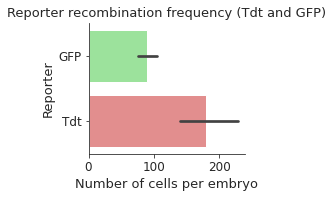

In [9]:
# Create the dataframe from excel file, name it df
df = pd.read_excel(Tdt_GFP_02mgTAM)

# Select GFP and Tdtomato counts
df_reporters = df[['GFP','Tdt']]

# Tidy data
df_reporters = df_reporters.melt()

# Create a horizontal bar plot
mpl.rcParams['figure.figsize'] = 4.5,3 #make it a bit wider to make room for the labelsb

ax = sns.barplot(data=df_reporters, x = 'value', y = 'variable', orient='h', palette=['lightgreen', 'lightcoral'])

# Add labels and title
plt.xlabel('Number of cells per embryo')
plt.ylabel('Reporter')
plt.title('Reporter recombination frequency (Tdt and GFP)')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# save the plot in vector format
plt.savefig(os.path.join(out,'reporter_frequency.svg'))

To ensure recombination occurs at an optimal clonal density, enabling the confident identification of labeled cell clusters as clonal, we examined clusters of labeled cells – coherent groups of isolated cells – based on their color. Bicolour clusters, consisting of cells marked with both GFP+ and tdtomato+, arise from the recombination of independent progenitors and the subsequent spatial overlap of their offspring during tissue growth. These clusters serve as a proxy for the frequency at which progenies from different cells that recombined the same reporter can overlap. To minimize such events, we aimed to determine the tamoxifen dose that would yield a sufficiently low frequency of bicolour clusters for efficient clonal analysis.

The initial administration of 0.20mg of tamoxifen resulted in a notable number of bicolour clusters. In response, we decreased the tamoxifen dose to 0.1mg at E5.75 and further reduced it to 0.0675mg at E6.25. As expected, this lower dosage led to a reduction in the number of bicolour clusters within the heart tube region.

In [10]:
df = pd.read_excel(TAM_doses)
df.head()

,litter,aimed_stage,dose,total_embryos,fluorescent,GFP_heart,Tdtomato_heart,Both_heart
0,1,6.25,0.0040,8,8,1,4,1
1,2,6.25,0.0040,7,7,0,2,1
2,3,6.25,0.0040,11,8,2,3,0
3,4,6.25,0.0027,9,5,1,2,0
4,5,6.25,0.0027,6,2,0,1,0


In [24]:
# Define a function to calculate percentages and store them as a column
def calculate_percentages(df, stage):
    df_stage = df[df['aimed_stage'] == stage].groupby('dose').sum()
    df_stage['Fluorescent'] = (df_stage['fluorescent'] / df_stage['total_embryos']) * 100
    df_stage['Bicolor Cardiac'] = (df_stage['Both_heart'] / df_stage['total_embryos']) * 100
    return df_stage

# Calculate the sum of data for each dose and aimed stage
df_sum = df.groupby(['dose', 'aimed_stage']).sum()

# Calculate the percentages for each aimed stage and create DataFrames
df_625 = calculate_percentages(df, 6.25)
df_575 = calculate_percentages(df, 5.75)

# Export the table to an Excel file for supplementary info (excluding the 'litter' column)
df_sum.drop(columns=['litter'], inplace=True)
df_sum.to_excel(os.path.join(results, "litters_dose.xlsx"))


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


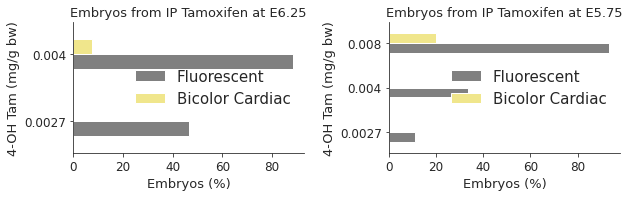

In [12]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

# Create the first horizontal bar plot on the left
df_625[['Fluorescent', 'Bicolor Cardiac']].plot(kind='barh', color=['gray', 'khaki'], width=0.45, ax=ax1)

# Axis titles and plot title for the first plot
ax1.set_xlabel('Embryos (%)')
ax1.set_ylabel('4-OH Tam (mg/g bw)')
ax1.set_title('Embryos from IP Tamoxifen at E6.25')

# Hide the right and top spines for the first plot
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Add legend for the first plot
ax1.legend(loc='center right', frameon=False)

# Create the second horizontal bar plot on the right
df_575[['Fluorescent', 'Bicolor Cardiac']].plot(kind='barh', color=['gray', 'khaki'], width=0.45, ax=ax2)

# Axis titles and plot title for the second plot
ax2.set_xlabel('Embryos (%)')
ax2.set_ylabel('4-OH Tam (mg/g bw)')
ax2.set_title('Embryos from IP Tamoxifen at E5.75')

# Hide the right and top spines for the second plot
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add legend for the second plot
ax2.legend(loc='center right', frameon=False)

# Adjust layout
plt.tight_layout()

plt.savefig(os.path.join(out, 'TAM_doses_bicolor_clusters.svg'))

So we decide to use 0.0027 for induction at E6.25 and 0.04 for induction at E5.75

Following this setup, we generated a collection of 71 litters and
737 embryos. Although we used the appropriate doses for clonal analysis, some litters
presented unusually high recombination rates. To avoid including overlapping clusters
that would introduce spurious clones in our analysis, we discarded 5 litters containing
more than 42% bicolor embryos, which exceeded the maximum recombination
rate estimated above. 

Next, we focused on studying the embryos with fluorescence in the cardiac area.
Thus, we selected 44 embryos, each presenting a cluster in the heart, for further analysis.
To calculate the probability of finding monocolor clusters with clonal origin in our
collection—the probability of monocolor groups of cells arising from recombination in a single cell— we used the two–reporter strategy. Briefly,
we calculated the probability of finding monocolor clusters with polyclonal origin from
the number of bicolor clusters in the collection and the relative recombination rate of
each reporter (Methods). In our case, 4.5% of the clusters analyzed (2/44) were bicolor, so monocolor cell clusters in our collection had a 94.5 % chance of
being actual clones (Methods).

### Calculate the % of bicolour clusters in the collection

Frequency of bicolor clusters in the cardiac collection: 0.03636363636363636


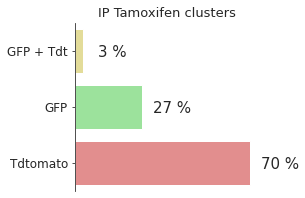

In [13]:
# Load data from the cluster collection
# This is an excel file with several sheets
# Each sheet contains metadata on litters, embryos or clusters of cells analyzed
data = pd.ExcelFile(cluster_collection)

litters = data.parse(0)
litters.index += 1 # set a consistent index starting from 1

embryos = data.parse(1)
embryos.index += 1 # set a consistent index starting from 1
    
clusters = data.parse(2)
clusters.index += 1 # set a consistent index starting from 1
clusters_copy = clusters.copy()  # Create an unaltered copy for later use

# Calculate the frequency of bicolor clusters
bicolor_clusters = embryos['num_cardiac_clusters'].value_counts().get(2, 0) + 1
unicolor_clusters = embryos['num_cardiac_clusters'].value_counts().get(1, 0)
bicolor_freq = bicolor_clusters / unicolor_clusters

# This is the frequency we use to calculate the probabiliy of polyclonality
print('Frequency of bicolor clusters in the cardiac collection: ' + str(bicolor_freq))

# Calculate the percentage of clusters per reporter in the collection
clusters_reporter = pd.DataFrame(clusters['reporter'].value_counts() - bicolor_clusters)
clusters_reporter.loc['GFP + Tdt'] = [bicolor_clusters]
clusters_reporter_perc = clusters_reporter / clusters_reporter.sum() * 100
clusters_reporter_perc = clusters_reporter_perc.iloc[::-1]


# Create the bar plot for percentage of clusters per reporter
ax = sns.barplot(x='reporter', y=clusters_reporter_perc.index, data=clusters_reporter_perc,
                 palette=['khaki', 'lightgreen', 'lightcoral'])

# Remove ticks for sthetics
ax.tick_params(bottom=False, labelbottom=False)
ax.set(xlabel=None)
plt.title('IP Tamoxifen clusters')

# Hide the right and top spines
for spine in ['right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)
    
    
# 8. Display each value at the top of the bar
# create a list to collect the plt.patches data (location of the bar boxes)
totals = []

# find the values and append to list
for i in ax.patches: # these are the values of the barplot boxes.
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)



i = 0
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height == 0:
        continue
    x, y = p.get_xy()
    ax.text(x+width + 12, # arbirtrary values set by eye by the user
            y+height - 0.37, # arbirtrary values set by eye by the user
            '{:.0f} %'.format(clusters_reporter_perc.iloc[i].values[0]), 
            horizontalalignment='center', 
            verticalalignment='center')
    i += 1

# Save the plot
plt.savefig(os.path.join(out, 'clusters_reporter.svg'))

# Later in AI we change the yellow by stripped green red pattern
# to avoid the confusion of double recombination in the same cell (yellow),
# which is not the same as a bicolor cluster (red and green cells overlapping)

These 44 clusters in our collection represented 46 clones (2 of the clusters were bicolor,
thus containing a GFP and a Tdtomato clone each). We analyzed their contribution
to the different embryonic compartments by immunostaining sarcomeric Myosin
heavy chain (MF20) and the ETS Transcription Factor ERG (ERG) to identify cardiomyocytes
and endothelial cells, respectively, followed by confocal imaging.

Although intraperitoneal 4–OH tamoxifen produces a concentration peak in blood
at 12 h after injection (Zovein et al., 2008), the actual embryonic stage at which recombination
takes place can only be roughly approximated. In addition to variability in the
mating times of mice and the embryonic developmental pace, recombination itself can
occur 4 to 24 h after tamoxifen administration (Hayashi and McMahon, 2002).
To overcome this uncertainty, we estimated the stage at which each clone originated
by looking at its total number of cells: the bigger the clone, the older it must be. Since
cells divide every ∼7-8 h on average during embryonic stages E6.5-E8.5 (Mittnenzweig
et al., 2021; Solter et al., 1971), we estimated the age of each clone
and subtracted it from the actual embryonic stage at dissection (Figure IV.10A and B).

For example, if an embryo had 9 somite pairs at dissection, which
corresponds to ∼E8.5 stage. Its clone had 48 cells, which means that a single cell was
divided log2(48) times to produce it, taking approximately 40 hours to do so. Therefore,
the stage of recombination is approximately the stage of dissection minus the age of the
clone, ∼E6.8.

define functions to retrieve metadata from the excel file cluster collection

In [14]:
def get_embryo_ID(cluster_id):
    '''
    Returns embryo_ID corresponding to that cluster
    
    '''
    return clusters.loc[clusters['cluster_ID'] == cluster_id,'embryo_ID'].values[0]

def get_litter_ID(cluster_id):
    '''
    Returns litter_ID corresponding to the embryo corresponding to that cluster
    
    '''
    return embryos.loc[embryos['embryo_ID'] == get_embryo_ID(cluster_id),'litter_ID'].values[0]

def get_somite_stage(cluster_id):
    '''
    Returns cluster's stage
    
    Parameters:
        cluster_id (int): The ID number to query

    Returns:
        get_stage(cluster_id): Somite pairs number.
        
    '''
    return embryos.loc[embryos['embryo_ID'] == get_embryo_ID(cluster_id),'stage(somite_pairs)'].values[0]


def get_e_stage(cluster_id):
    '''Calculate E stage from somites
    Assuming E8.2 = 1 somite pairs and a somite pair grows every 1h (E0.04) from 1 somite pair (E8.2) to 6 somite pairs (E8.4)
    and then every 1.4h (E0.06) from 6 somite pairs (E8.4) to 11 somite pairs (E8.7). And every 1.6h (E0.07)) from then on.
    
    Reference Patrick Tam, The control of somitogenesis in mouse embryos.
    https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.951.9513&rep=rep1&type=pdf

    '''
    
    somite_pairs = get_somite_stage(cluster_id)
    
    if somite_pairs == -1 : # LHF
        x = 7.8
    
    elif somite_pairs == 0: # LHF
        x = 7.9
    
    elif somite_pairs == 1: # LHF
        x = 8.0
        
    elif somite_pairs == 5: # Transversal heart tube 
        x = 8.25
        
    elif somite_pairs == 9: # looping
        x = 8.5
    
    elif 5 > somite_pairs > 1:
        x = 8.0 + round((0.25/5)*(somite_pairs-1), 2)  # from 1 to 5 to 8 somites the rate is 1.2h per somite 
        
    elif 9 > somite_pairs > 5:
        x = 8.25 + round((0.25/3)*(somite_pairs-5), 2)  # from 5 to 8 somites one the rate is 1.5h per somite 
    
    elif somite_pairs > 9:
        x = 8.5 + round((0.07)*(somite_pairs-12), 2)  # from 8 somites one the rate is 1.7h per somite (E0.07) 
    
    return round(x, 2)


def get_injection_stage(cluster_id):
    ''' Given a cluster_id, calculates E time between dissection and injection,
    then substract that to the stage of the embryo at dissection, giving an estimation of the injection stage

    '''
    # Get litter_id to retrieve injection/dissection info of it
    litter_id = get_litter_ID(cluster_id)

    # Time between injection and dissection in hours 
    time_delta = litters['dissection_datetime'][litter_id] - litters['injection_datetime'][litter_id]
    time_delta_h = time_delta.total_seconds()/3600  # 1h = 3600 seconds

    # conversion to E time between injection and dissection. 
    time_delta_E = time_delta_h/24  # E1.0 is 24h

    # Substract to observed embryo stage to estimate its stage at injection time
    embryo_stage_injection = get_e_stage(cluster_id) - time_delta_E

    return embryo_stage_injection


def get_cluster_age(cluster_id):
    ''' Given a cluster_id, calculates time between dissection and expected recombination peak in hours
    '''
    # Get litter_id to retrieve injection/dissection info of it
    litter_id = get_litter_ID(cluster_id)

    # Time between injection and dissection in hours 
    time_delta = litters['dissection_datetime'][litter_id] - litters['injection_datetime'][litter_id]
    time_delta_h = time_delta.total_seconds()/3600  # 1h = 3600 seconds
    
    return time_delta_h - 12 #assumes recombination takes place 12h after tamoxifen injection

def get_time_since_injection(cluster_id):
    ''' Given a cluster_id, calculates time between injection stage and estimated clone recombination stage
    Assumes plug day at 00:00 is E0.0
    '''
    # Get litter_id to retrieve injection/dissection info of it
    litter_id = get_litter_ID(cluster_id)

    # Time between injection and plug in hours 
    injection_time = litters['injection_datetime'][litter_id] - litters['plug_date'][litter_id]
    injection_time_h = injection_time.total_seconds() / 3600  # 1h is 3600 seconds

    # Time between dissection and plug in hours
    dissection_time = litters['dissection_datetime'][litter_id] - litters['plug_date'][litter_id]
    dissection_time_h = dissection_time.total_seconds() / 3600

    # Delay between the injection of TAM to the female and the actual Cre loxP recombination
    time_since_injection = dissection_time_h - injection_time_h

    return time_since_injection


Subset the collection to work only with clones contributing to the heart

In [15]:
# make a new total_ec column and a total_my column. We first have to replace the Nan by 0, as otherwise the result of
# summing a Nan with a number will always be NaN
clusters.fillna(value = 0, inplace=True)

clusters['total_ec'] = clusters['num_ec_FHF'] + clusters['num_ec_SHF'] 
clusters['total_my'] = clusters['num_my_FHF'] + clusters['num_my_SHF'] + clusters['VP_my']

# Calculate N of heart positive embryos. That is clusters that have at least a heart cell. We subset the collection to that
clusters['total_heart'] = clusters['total_ec'] + clusters['total_my']

# Calculate 'total_heart' column
clusters['total_heart'] = clusters['total_ec'] + clusters['total_my']

# Subset the DataFrame to include only clusters with at least one heart cell
clusters = clusters[clusters['total_heart'] > 0]

#Save a copy for later
clusters_cardiac = clusters.copy()

In [16]:
# Calculate the predicted number of divisions based on the log2 of the number of cells
clusters['predicted_divisions'] = np.log2(clusters['sum_cells'])

# Calculate the estimated recombination stage based on predicted divisions and cell division rate
cell_division_rate_hrs = 8  # Average cell division rate in hours
hours_per_day = 24  # Number of hours in a day (E1.0 = 24h)

# Calculate estimated recombination stage
clusters['estimated_recombination_stage_divisions'] = (
    clusters['cluster_ID'].apply(get_e_stage) -
    ((clusters['predicted_divisions'] - 1) * cell_division_rate_hrs + 4) / hours_per_day
)


This method yielded estimated delays from injection to
recombination that were consistent with reported 4–OH Tamoxifen pharmacodynamics
in mice blood (Zovein et al., 2008), which levels peak around 12 h

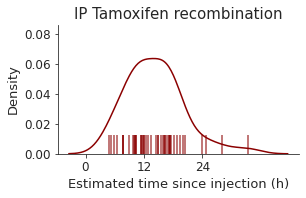

In [17]:
# Create a new column calculating this from the function we defined above
clusters['time_since_injection'] = clusters['cluster_ID'].map(get_time_since_injection)

# Obtain the recombination delay by subtracting the cluster age from this last one
clusters_age = (clusters['predicted_divisions'] - 1) * 8 + 4  # 1st division 4h, next every 8 hours
clusters['recombination_delay'] = clusters['time_since_injection'] - clusters_age
clusters.dropna(inplace=True)

# Plot
plt.figure(figsize=(4.5, 3))  # Make it a bit wider to make room for the labels

# Recombination time since injection
data = clusters
color = 'darkred'
ax = sns.kdeplot(data=data, x='recombination_delay',
                 color=color, label='IP tamoxifen')
ax = sns.rugplot(data=data, x='recombination_delay',
                 linewidth=1.5, alpha=0.7, height=0.15, color=color)

plt.xticks([0, 12, 24])

plt.xlabel('Estimated time since injection (h)')
plt.title('IP Tamoxifen recombination', fontsize=15)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Path to save the figure
path = 'recombination_time_since_injection.svg'

plt.savefig(os.path.join(out, path + '.svg'))


Interestingly, some of the mesoderm clones were symmetric and bilateral (Figure IV.10D).
As McDole et al. (2018) revealed by live imaging, epiblast cells in mice can generate such
mesoderm clones when two daughter cells ingress towards opposite mesodermal sides
(Figure IV.10E). Consistent with this, most bilateral clones in our collection were estimated
to originate before E6.75, stages when FHF progenitors have not yet entered the
mesoderm (Figure IV.10F). This sets an internal reference for our retrospective timing
system for when cardiac progenitors leave the epiblast and ingress the mesoderm.

Ks_2sampResult(statistic=0.7027027027027027, pvalue=0.00047807950708955715)


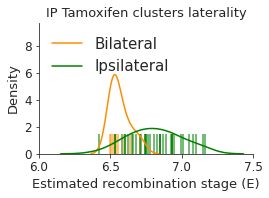

In [18]:
# Independent dataframes for each cluster type
bilateral = clusters[clusters['bilateral'] == 'YES'].copy()
ipsilateral = clusters[clusters['bilateral'] != 'YES'].copy()

# Path to save the figure
path = 'recombination_stage_laterality_divisions_density'

# Bins for the histogram, every 6 hours
stageticks = [6, 6.5, 7, 7.5]
bandwidth = 1  # Default parameter, smoothing of the KDE (Kernel Density Estimator) plot

# Plot one line at a time
plt.figure(figsize=(4, 3))  # Make it a bit wider to make room for the labels

# CM or EC - Bilateral
data = bilateral
color = 'darkorange'
ax = sns.kdeplot(data=data, x='estimated_recombination_stage_divisions',
                 color=color, bw_adjust=bandwidth, label='Bilateral')
ax = sns.rugplot(data=data, x='estimated_recombination_stage_divisions',
                 linewidth=1.5, alpha=0.7, height=0.15, color=color)

# CM or EC - Ipsilateral
data = ipsilateral
color = 'green'
ax = sns.kdeplot(data=data, x='estimated_recombination_stage_divisions',
                 color=color, bw_adjust=bandwidth, label='Ipsilateral')
ax = sns.rugplot(data=data, x='estimated_recombination_stage_divisions',
                 linewidth=1.5, alpha=0.7, height=0.15, color=color)

plt.xticks(stageticks)

plt.xlabel('Estimated recombination stage (E)')
plt.title('IP Tamoxifen clusters laterality')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='upper left', frameon=False)  # Reverse both handles and labels

plt.savefig(os.path.join(out, path + '.svg'))

# Test statistical differences between both distributions
print(ks_2samp(bilateral['estimated_recombination_stage_divisions'], ipsilateral['estimated_recombination_stage_divisions']))


Using our stage estimation system, we ordered clones chronologically along with
their cellular contributions, which we had previously analyzed using
whole–mount confocal microscopy. As expected, earlier inductions
produced clones that contributed to several mesodermal compartments, including extraembryonic
tissues, while later inductions contributed to more restricted locations.
Surprisingly, only two of the unspecified clones contributed exclusively to CM and
EC, while most of them also contained cells outside the primitive heart tube. While fully specified clones dated after Late Streak stages (∼E7.0), earlier inductions
yielded multipotent clones containing also cells outside the heart.

In [32]:
# Replace NaN values with 0 to be able to add all categories
clusters.fillna(0, inplace=True)

# Sum cell counts for major anatomic locations into a new dataframe
clusters_summary = clusters.copy()
clusters_summary['CM'] = clusters_summary['num_my_FHF'] + clusters_summary['num_my_SHF'] + clusters_summary['VP_my']
clusters_summary['EC'] = clusters_summary['num_ec_FHF'] + clusters_summary['num_ec_SHF']
clusters_summary['EmM'] = (clusters_summary['marginal_zone'] + clusters_summary['VP_other'] + clusters_summary['num_pericardium'] + 
                       clusters_summary['num_mes_splachnic'] +  clusters_summary['caudal_mesenchyme'])                       
clusters_summary['EmEt'] = clusters_summary['aortas_et']  + clusters_summary['VP_et']
clusters_summary['ExM'] = clusters_summary['extraembryonic_mesoderm'] 
clusters_summary['ExEt'] = clusters_summary['extraembryonic_et']
clusters_summary['End'] = clusters_summary['visceral_endoderm']

# Create a 'total' column by summing all major anatomic locations
clusters_summary['total'] = clusters_summary.loc[:, 'CM':'End'].sum(axis=1)

# Sort clusters by estimated recombination stage
clusters_summary.sort_values(by=['estimated_recombination_stage_divisions'], inplace=True)

# Reset the index to start from 1, so each clusters get an identifier plotted in the heatmap. in order of estimated age.
# Rename the index starting from 1
clusters_summary.reset_index(drop=True, inplace=True)
clusters_summary.index += 1
# Rename previous cluster ID 
clusters_summary.rename(columns = {'cluster_ID' : 'old_cluster_ID_unsorted'}, inplace=True) 

In [43]:
# Select and copy relevant columns for plotting
columns_to_plot = ['CM', 'EC', 'EmM', 'EmEt', 'ExM', 'ExEt', 'End']
clusters_summary_num = clusters_summary[columns_to_plot].copy()

# Add relevant columns save as an excel file
# First create a copy
clusters_summary_num_save = clusters_summary_num.copy()

# Columns to add from clusters_summary to clusters_summary_num_save
columns_to_add = [
    'old_cluster_ID_unsorted',
    'aimed_stage',
    'embryo_ID',
    'time_since_injection',
    'recombination_delay',
    'estimated_recombination_stage_divisions',
    'bilateral',
    'total'
]

# Concatenate the specified columns along the columns axis
merged_df = pd.concat([clusters_summary_num_save, clusters_summary[columns_to_add]], axis=1)

# Save the modified DataFrame as an Excel file
output_path = os.path.join(results, "retrospective_clonal_analysis_celltype_numbers_est_age.xlsx")
merged_df.to_excel(output_path)

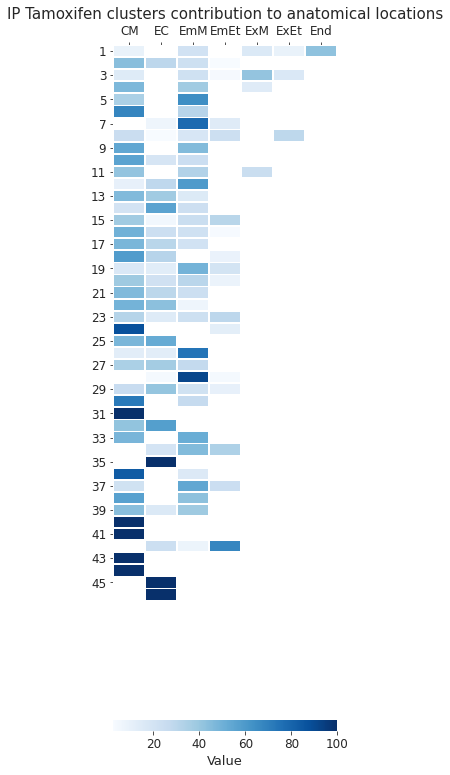

In [40]:
# Normalize the values to percentages
clusters_summary_norm = clusters_summary_num.div(clusters_summary_num.sum(axis=1), axis=0) * 100

# Set figure size
plt.figure(figsize=(6, 12))

# Replace 0 values with NaN
clusters_summary_norm = clusters_summary_norm.replace(0, np.nan)

# Create a mask to set NaN values to white in the heatmap
mask = clusters_summary_norm.isna()

# Create the heatmap with the custom colormap
ax = sns.heatmap(clusters_summary_norm, fmt='g', linewidth=0.8, cmap='Blues', mask=mask,
                 cbar_kws={'label': 'Value', 'orientation': 'horizontal'})

# Rotate y-axis labels
plt.yticks(rotation=0)
plt.title('IP Tamoxifen clusters contribution to anatomical locations', fontsize=15)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(out, 'summary_table' + '.svg'))


C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:332: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  ax.figure.draw(ax.figure.canvas.get_renderer())
C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app
C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


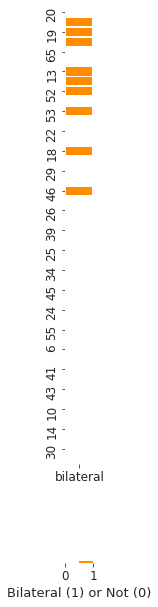

In [21]:
# Set the path for saving the figure
path = 'summary_table_bilateral_column'

# Create a DataFrame with a binary representation of bilateral (1) or not (0)
clusters_bilateral = clusters_summary['bilateral'].replace({'YES': 1, 'NO': 0, '?': 0}).to_frame()

# Set figure size
plt.figure(figsize=(0.5, 12))

# Create the heatmap
ax = sns.heatmap(clusters_bilateral, fmt='g', linewidth=0.8, cmap=['white', 'darkorange'],
                 cbar_kws={'label': 'Bilateral (1) or Not (0)', 'orientation': 'horizontal'})

# Save the figure
plt.savefig(os.path.join(out, path + '.svg'))


#### Chord diagram showing the Jaccard similarity score between the different cell types studied (n = 44 embryos).

To analyze the lineage relationship between cardiomyocytes, endocardial cells and
other embryonic compartments, we calculated the Jaccard similarity score for each possible
combination. That is the number of clones that contain both types
of cells divided by the total number of clones that contain any of the types alone or
together. This revealed that CMs and ECs do not appear together often; instead, CMs
are more related to other splanchnic mesoderm. Also, ECs appeared more frequently
together with other endothelial types than with CMs

- https://www.statisticshowto.com/jaccard-index/

Apply to all the possible combinations in the summary dataframe to create a similarity matrix that we can later use to plot the chord circle.

Representing correlation between cell types. Cuincidence of cell types in the same cluster regardless of the number because we convert all positive values to 1

In [49]:
# Drop the endoderm
clusters_summary_num.drop(['End'], axis=1, inplace=True)

C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':
C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


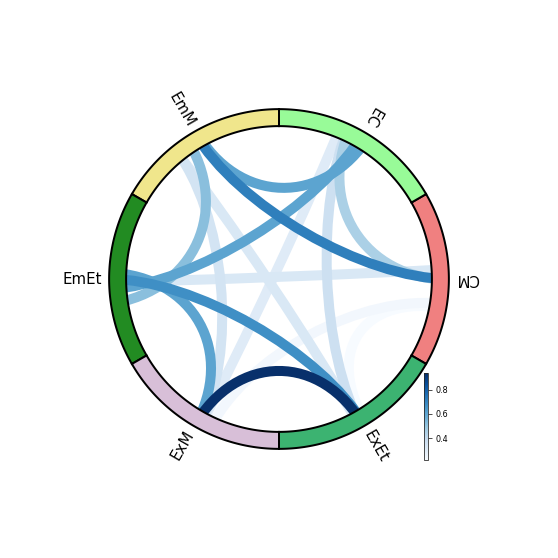

C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [51]:
# Convert the clusters count dataframe to a binary. If there are cells of that type then 1 else 0. 
clusters_summary_num[clusters_summary_num > 0] = 1

# Calculate the Jaccard similarity matrix for the entire DataFrame
# This is the coapearence frequency of two cell types in the same cluster
matrix = 1 - pairwise_distances(clusters_summary_num.T, metric="hamming")

# 'matrix' now contains the Jaccard similarity values, which we save in a table
fig.savefig(os.path.join(out, 'chord_cell_type_coapearance_jaccard.svg'))

# Names of the nodes of the circle
names = clusters_summary_num.columns.tolist()

N = len(names)  # Number of nodes (cell types) to connect in the chord diagram
node_names = names  # Names of the cell types to connect

colors = ['lightcoral', 'palegreen', 'khaki', 'forestgreen', 'thistle', 'mediumseagreen']

fig, axes = plot_connectivity_circle(matrix, node_names, node_colors=colors, fontsize_names=15,
                                             colormap='Blues', facecolor='white', textcolor='black',
                                             linewidth=10)

fig.savefig(os.path.join(out, 'chord_cell_type_coapearance_jaccard.svg'))


In [52]:
# Save a copy of the matrix with the annotated celltypes
column_names = clusters_summary_num.columns.tolist()

df = pd.DataFrame(data=matrix, columns=column_names)

# save dataframe
output_path = os.path.join(results, "Retrospective_clonal_analysis_Jaccard_correlation_matrix.xlsx")
df.to_excel(output_path)

#### Compare the composition of CM and EC clones. 
- What proportion of them are CM or EC-only. 
- When they share with other undifferentiated mesodermal tissues, what are those other tissues? Other endothelium? Other mesoderm that is not differentiated?

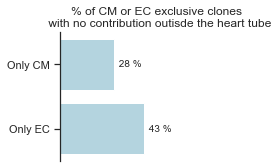

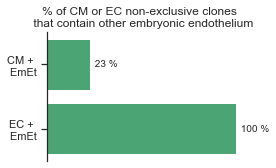

In [167]:
df = clusters_summary

# Filter rows with CM > 0 and EC == 0
cm_subset = df[(df['CM'] > 0) & (df['EC'] == 0)]
cm_and_other = cm_subset[cm_subset['CM'] != cm_subset['total']]

# Filter rows with EC > 0 and CM == 0
ec_subset = df[(df['EC'] > 0) & (df['CM'] == 0)]
ec_and_other = ec_subset[ec_subset['EC'] != ec_subset['total']]

# Calculate percentages for CM subset
# The mean of a boolean series (0 or 1) is actually the proportion of true values
only_cm_percentage = (cm_subset['CM'] == cm_subset['total']).mean() * 100
cm_emet_percentage = (cm_and_other['EmEt'] > 0).mean() * 100

# Calculate percentages for EC subset
only_ec_percentage = (ec_subset['EC'] == ec_subset['total']).mean() * 100
ec_emet_percentage = (ec_and_other['EmEt'] > 0 ).mean() * 100

# Calculate the average 'estimated_recombination_stage_divisions' for each category
#avg_only_cm_divisions = cm_subset.loc[cm_subset['CM'] == cm_subset['total']]['estimated_recombination_stage_divisions'].mean()
#avg_cm_emet_divisions = cm_subset.loc[cm_subset['EmEt'] > 0]['estimated_recombination_stage_divisions'].mean()

#avg_only_ec_divisions = ec_subset.loc[ec_subset['EC'] == ec_subset['total']]['estimated_recombination_stage_divisions'].mean()
#avg_ec_emet_divisions = ec_subset.loc[ec_subset['EmEt'] > 0]['estimated_recombination_stage_divisions'].mean()

# Create DataFrames for plotting
exclusive_df = pd.DataFrame({
    'Condition': ['Only CM', 'Only EC'],
    'Percentage': [only_cm_percentage, only_ec_percentage],
    'Average Divisions': [avg_only_cm_divisions, avg_only_ec_divisions]
})

with_et_df = pd.DataFrame({
    'Condition': ['CM + \n EmEt', 'EC + \n EmEt'],
    'Percentage': [cm_emet_percentage, ec_emet_percentage],
    'Average Divisions': [avg_cm_emet_divisions, avg_ec_emet_divisions]
})


# Set the style to "ticks" to remove background lines
sns.set_style("ticks")
# Create the horizontal stacked bar plots for exlcusive CM or EC conditions
plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data=exclusive_df, x='Percentage', y='Condition', palette=['lightblue'])
plt.title('% of CM or EC exclusive clones \n with no contribution outisde the heart tube')
plt.xlim(0, 100)

# Remove ticks for sthetics
ax.tick_params(bottom=False, labelbottom=False)
ax.set(xlabel=None)
ax.set(ylabel=None)


# Hide the right and top spines
for spine in ['right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

#annotate percentage
for i, val in enumerate(exclusive_df['Percentage']):
    plt.text(val + 1, i, f' {val:.0f} %', va='center', fontsize=10)
    
plt.savefig(os.path.join(out, 'Percentage_CM_or_EC_exclusive.svg'))

    
# Create the horizontal stacked bar plots for EmEt contributions
plt.figure(figsize=(4, 2.5))
ax = sns.barplot(data=with_et_df, x='Percentage', y='Condition', palette=['mediumseagreen'])
plt.title('% of CM or EC non-exclusive clones \n that contain other embryonic endothelium')
plt.xlim(0, 100)

# annotate percentage values
for i, val in enumerate(with_et_df['Percentage']):
    plt.text(val + 1, i, f' {val:.0f} %', va='center', fontsize=10)

    
# Remove ticks for sthetics
ax.tick_params(bottom=False, labelbottom=False)
ax.set(xlabel=None)
ax.set(ylabel=None)

# Hide the right and top spines
for spine in ['right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)
    
    
plt.savefig(os.path.join(out, 'Percentage_EmEt_contributions.svg'))


#### Analyzing embryos from Padron-Bathe et al 2014
We recovered LacZ Bgal embryos that were saved in the lab and studied the cell contribution of those present in the heart, where CM and EC can be distinguished by morphology

In [145]:
cluster_collection_LP = '../data/retrospective_clonal_analysis_LP/supplementary_data_clusters_retrospective_LP.xlsx'
clusters = pd.read_excel(cluster_collection_LP)

In [146]:
# Replace NaN values with 0 to be able to add all categories
clusters.fillna(0, inplace=True)

# Sum cell counts for major anatomic locations into a new dataframe
clusters_summary = clusters.copy()
clusters_summary['EmM'] = clusters_summary['AsM'] + clusters_summary['Peri'] + clusters_summary['MsM'] + clusters_summary['PsM']                      

# Create a 'total' column by summing all major anatomic locations
clusters_summary['total'] = clusters_summary.loc[:, 'ExM':'End'].sum(axis=1)


C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
C:\Users\msendra\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


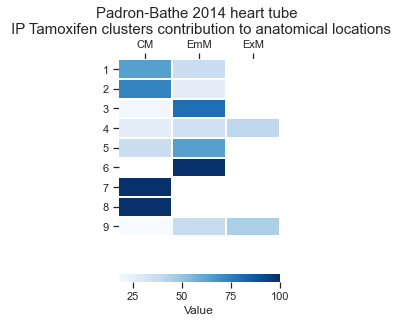

In [147]:
# Reset the index to start from 1, so each clusters get an identifier plotted in the heatmap
clusters_summary.index += 1

# Select and copy relevant columns for plotting
columns_to_plot = ['CM', 'EmM', 'ExM']
clusters_summary_num = clusters_summary[columns_to_plot].copy()

# Normalize the values to percentages
clusters_summary_norm = clusters_summary_num.div(clusters_summary_num.sum(axis=1), axis=0) * 100

# Set figure size
plt.figure(figsize=(3, 4))

# Replace 0 values with NaN
clusters_summary_norm = clusters_summary_norm.replace(0, np.nan)

# Create a mask to set NaN values to white in the heatmap
mask = clusters_summary_norm.isna()

# Create the heatmap with the custom colormap
ax = sns.heatmap(clusters_summary_norm, fmt='g', linewidth=0.8, cmap='Blues', mask=mask,
                 cbar_kws={'label': 'Value', 'orientation': 'horizontal'})

# Rotate y-axis labels
plt.yticks(rotation=0)
plt.title('Padron-Bathe 2014 heart tube \n IP Tamoxifen clusters contribution to anatomical locations', fontsize=15)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(out, 'Padron-Bathe 2014 summary_table' + '.svg'))


In [149]:
clusters_summary

,aimed_stage,stage_dissection,embryo_label,reporter,bilateral,ExM,Ex-Et,AsM,Peri,CM,EC,MsM,E-Et,PsM,End,EmM,total
1,E7.0,3,LR60_E3,EYFP,NO,0.0,0.0,0.0,9.0,16.0,0.0,0.0,0.0,0.0,0.0,9.0,25.0
2,E7.0,14,LR17_E2,LacZ,NO,0.0,0.0,0.0,0.0,25.0,0.0,9.0,0.0,0.0,0.0,9.0,34.0
3,E7.0,2,LR90_E2,LacZ,NO,0.0,0.0,7.0,0.0,5.0,0.0,13.0,0.0,0.0,0.0,20.0,25.0
4,E7.0,1,LR79_E1,EYFP,NO,14.0,0.0,12.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,12.0,35.0
5,E7.0,6,LR76_E6,LacZ,NO,0.0,0.0,8.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,21.0,33.0
6,E7.0,3,LR74_E5,LacZ,YES,0.0,0.0,7.0,0.0,0.0,0.0,27.0,0.0,14.0,0.0,48.0,48.0
7,E7.0,3,LR74_E4,LacZ,NO,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
8,E7.0,12,LR19_E7,EYFP,NO,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
9,E7.0,2,LR69_E1,EYFP,YES,18.0,0.0,15.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,15.0,40.0
